In [1]:
import nltk
import random
import time

In [2]:
g_t0 = time.time()

In [3]:
treebank_sents = list(nltk.corpus.treebank.tagged_sents())
print (len(treebank_sents))

random.shuffle(treebank_sents)

test_train_split = 3200
train_sents = treebank_sents[:test_train_split]
test_sents = treebank_sents[test_train_split:]

3914


In [4]:
def num_tokens(tagged_sents):
    return sum([len(s) for s in tagged_sents])

In [5]:
class UnigramTagger(object):
    def __init__(self, train_size):
        self.train_size = train_size
    
    def train(self, train_sents):
        train_sents = train_sents[:self.train_size]
        self.tokens_size = num_tokens(train_sents)
        
        self._tagger = nltk.tag.UnigramTagger(train_sents)
        
    def test(self, test_sents):
        return self._tagger.evaluate(test_sents)

In [6]:
class BigramTagger(object): 
    def __init__(self, train_size):
        self.train_size = train_size

    def train(self, train_sents):
        train_sents = train_sents[:self.train_size]
        self.tokens_size = num_tokens(train_sents)
        
        self._tagger = nltk.tag.BigramTagger(train_sents)
        
    def test(self, test_sents):
        return self._tagger.evaluate(test_sents)

In [7]:
class BrillTagger(object):
    def __init__(self, train_size):
        self.train_size = train_size

    def train(self, train_sents):
        train_sents = train_sents[:self.train_size]
        self.tokens_size = num_tokens(train_sents)
        
        unigram_tagger = nltk.tag.UnigramTagger(train_sents)
        brill_trainer = nltk.tag.brill_trainer.BrillTaggerTrainer(unigram_tagger, nltk.tag.brill.brill24())
        self._tagger = brill_trainer.train(train_sents)
        
    def test(self, test_sents):
        return self._tagger.evaluate(test_sents)

In [8]:
class PerceptronTagger(object):  
    def __init__(self, train_size):
        self.train_size = train_size

    def train(self, train_sents):
        train_sents = train_sents[:self.train_size]
        self.tokens_size = num_tokens(train_sents)
        
        self._tagger = nltk.tag.perceptron.PerceptronTagger(load=False)
        self._tagger.train(train_sents)
        
    def test(self, test_sents):
        return self._tagger.evaluate(test_sents)

In [9]:
class TnTTagger(object):   
    def __init__(self, train_size):
        self.train_size = train_size
    
    def train(self, train_sents):
        train_sents = train_sents[:self.train_size]
        self.tokens_size = num_tokens(train_sents)
        
        self._tagger = nltk.tag.tnt.TnT()
        self._tagger.train(train_sents)
        
    def test(self, test_sents):
        return self._tagger.evaluate(test_sents)

In [10]:
taggers = []
for i in range(1, 6):
    train_size = i * 200
    taggers.append(UnigramTagger(train_size))
    taggers.append(BigramTagger(train_size))
    taggers.append(BrillTagger(train_size))
    taggers.append(PerceptronTagger(train_size))
    taggers.append(TnTTagger(train_size))

In [11]:
train_times = []
for t in taggers:
#     print (type(t).__name__)
    t0 = time.time()
    t.train(train_sents)
    t1 = time.time()
    train_times.append(t1 - t0)

In [12]:
accuracies = []
test_times = []
for t in taggers:
#     print (type(t).__name__)
    t0 = time.time()
    accuracy = t.test(test_sents[:500])
    t1 = time.time()
    accuracies.append(accuracy)
    test_times.append(t1 - t0)

In [13]:
g_t1 = time.time()
print (g_t1 - g_t0)

637.1776459217072


In [14]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("darkgrid")

In [15]:
tagger_types = [type(t).__name__ for t in taggers]
train_sizes = [t.tokens_size for t in taggers]

test_runs = [('tagger_type', tagger_types),
             ('tokens_size', train_sizes),
             ('accuracy', accuracies),
             ('train_time', train_times),
             ('test_time', test_times)]

df = pd.DataFrame.from_items(test_runs)
grouped = df.groupby(['tagger_type'])

In [16]:
def my_plot(grouped, field):
    fig, ax = plt.subplots(figsize=(8,6))
    for key, grp in grouped:
        grp.plot(x='tokens_size', y=field, ax=ax, label=key)
    plt.legend(loc='best')    
    plt.show()

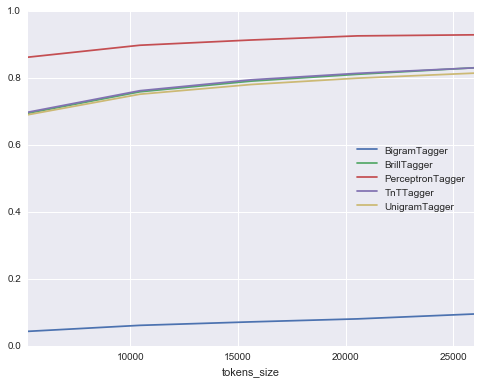

In [17]:
my_plot(grouped, 'accuracy')

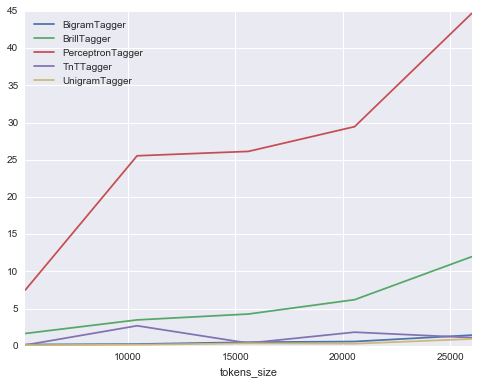

In [18]:
my_plot(grouped, 'train_time')

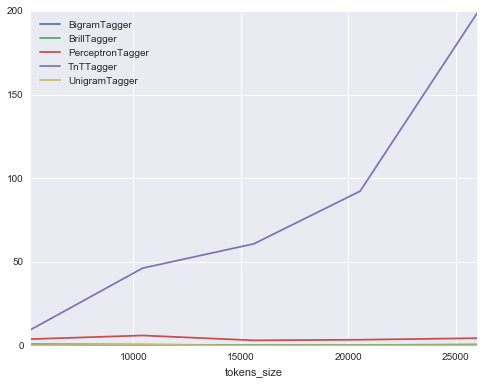

In [19]:
my_plot(grouped, 'test_time')